# Bonner sphere mapping with the old target

- Code and data is in /Users/hkromer/02_PhD/02_Data/06.BS_Mapping/BS_mapping/2017-10-12_BS_Mapping/2017-10-12_Plots
- Some report can already be found in /Users/hkromer/02_PhD/04_Publiations/04_Reports/05_BSMapping/2018-01-04_BS_Mapping.docx

In [8]:
import time
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import AutoMinorLocator
import re
import copy

def extractDirection(df):
    if 'N' in df:
        return 'North'
    if 'S' in df:
        return 'South'
    if 'E' in df:
        return 'East'

def extractDistance(df):
    t = re.findall(r'(\d+)', df)
    return t[0]

import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

## Read the data

- script to get all data from the database is already executed
- also some processing on the statistics has been done

- ctBS_mean is the countrate in the bonner sphere (in this case BS2) per second. Averaged over the measurement interval which was around 10-15 minutes.

- BS_norm_dose is the counts in the BS normed by the mean of the dose (measured with BS1), again in the respective measurement interval.

In [9]:
data_fname = '/Users/hkromer/02_PhD/02_Data/06.BS_Mapping/BS_mapping/2017-10-12_BS_Mapping/2017-10-12_df_result.csv'
df = pd.read_csv(data_fname, index_col=0)

df

,dose_mean,dose_err,refCt_mean,refCt_sum,refCt_time,refCt_err,ctWS_mean,ctWS_sum,ctWS_time,ctWS_err,...,ctBS_err,direction,distance,distance_err,BS_norm_dose,BS_norm_dose_err,BS_norm_refCt,BS_norm_refCt_err,BS_norm_WS,BS_norm_WS_err
run66S,449.050839,0.002477,885.704545,12127.0,12.0,0.009081,12.044444,4336.0,12.0,0.015186,...,0.003363,South,66,2,0.582011,0.001355,0.585665,0.002519,0.591152,0.309756
run150S,443.409836,0.002719,862.021212,9869.0,10.0,0.010066,11.909091,3930.0,11.0,0.015952,...,0.007283,South,150,2,0.137061,0.000351,0.139931,0.000667,0.139027,0.076521
run100S,423.795330,0.003591,820.787879,5674.0,6.0,0.013276,11.476190,2410.0,7.0,0.020370,...,0.006562,South,100,2,0.277635,0.000937,0.284519,0.001789,0.279314,0.196314
run197S,444.874093,0.002297,862.549784,13824.0,14.0,0.008505,11.915556,5362.0,15.0,0.013656,...,0.007685,South,197,2,0.089967,0.000195,0.092097,0.000371,0.091509,0.043124
run53E,440.454545,0.003865,885.321212,5051.0,5.0,0.014071,12.455556,2242.0,6.0,0.021119,...,0.004494,East,53,2,0.664347,0.002414,0.656005,0.004372,0.640018,0.466380
run75E,451.535022,0.004261,904.621212,4118.0,4.0,0.015583,12.566667,1885.0,5.0,0.023033,...,0.006561,East,75,2,0.364921,0.001462,0.361522,0.002668,0.357214,0.283883
run100E,447.299864,0.002583,873.037879,11975.0,12.0,0.009138,12.530556,4511.0,12.0,0.014889,...,0.005425,East,100,2,0.224464,0.000545,0.228257,0.000988,0.218290,0.112141
run150E,444.545455,0.002865,885.121212,9090.0,9.0,0.010489,12.106667,3632.0,10.0,0.016593,...,0.008168,East,150,2,0.119559,0.000323,0.119181,0.000592,0.119600,0.068477
run185E,448.770692,0.002579,890.575758,11170.0,11.0,0.009462,12.322222,4436.0,12.0,0.015014,...,0.008692,East,185,2,0.087158,0.000212,0.087171,0.000391,0.086477,0.044805
run55N,439.405268,0.003261,872.121212,6979.0,7.0,0.011970,11.970833,2873.0,8.0,0.018657,...,0.003176,North,55,2,1.000000,0.003065,1.000000,0.005669,1.000000,0.643720


In [10]:
df_north = df[ df['direction'] == 'North']
df_south = df[ df['direction'] == 'South']
df_east = df[ df['direction'] == 'East']

for df in [df_north, df_south, df_east]:
    df = df.sort_values(['distance'], ascending=True)

In [11]:
df_north

,dose_mean,dose_err,refCt_mean,refCt_sum,refCt_time,refCt_err,ctWS_mean,ctWS_sum,ctWS_time,ctWS_err,...,ctBS_err,direction,distance,distance_err,BS_norm_dose,BS_norm_dose_err,BS_norm_refCt,BS_norm_refCt_err,BS_norm_WS,BS_norm_WS_err
run55N,439.405268,0.003261,872.121212,6979.0,7.0,0.011970,11.970833,2873.0,8.0,0.018657,...,0.003176,North,55,2,1.000000,0.003065,1.000000,0.005669,1.000000,0.643720
run100N,437.069051,0.003536,841.287879,5797.0,6.0,0.013134,11.809524,2480.0,7.0,0.020080,...,0.005956,North,100,2,0.326751,0.001086,0.336926,0.002096,0.329453,0.228262
run150N,429.726776,0.003566,833.454545,5750.0,6.0,0.013188,11.690476,2455.0,7.0,0.020182,...,0.008309,North,150,2,0.170747,0.000573,0.174733,0.001091,0.170990,0.119075
run175N,428.589635,0.003302,819.549784,6611.0,7.0,0.012299,11.937500,2865.0,8.0,0.018683,...,0.008792,North,175,2,0.133810,0.000416,0.138889,0.000809,0.130881,0.084372


## Load the total counts in the LB6411 per source particle

- is stored in the MCNP data files: /Volumes/hkromer/10_Experiments/02_MCNP/
- a list of each mcnp run is in the notion card MCNP Run Overview

- in each MCNP run folder, the file "df_counts.csv" contains the total counts in the LB6411 per MCNP source particle. In this dataframe, the response of the LB6411 is already accounted for


In [12]:
"""
M_tot from MCNP: total counts in LB6411 per source particle

1. relative behaviour. Set M_tot(55 cm N) as the reference point and check the behaviour of the countrate for the other
directions.
"""

MCNP_data_fname = '/Users/hkromer/02_PhD/02_Data/06.BS_Mapping/BS_mapping/2017-10-12_BS_Mapping/df_counts.csv'

df_mcnp = pd.read_csv(MCNP_data_fname, index_col=0)
M_tot = df_mcnp.iloc[-1]
M_tot = pd.DataFrame(M_tot)
# print(M_tot)
M_tot['direction'] = M_tot.index
M_tot['distance'] = M_tot.index

M_tot['direction'] = M_tot['direction'].map(extractDirection)
M_tot['distance'] = pd.to_numeric(M_tot['distance'].map(extractDistance))

lstDirection = ['North', 'South', 'East']


df_M_tot = pd.DataFrame()
d = np.arange(20, 240, 1)  # distance source to detector in cm

df_M_tot['distance'] = d

# interpolate M_tot values
M_tot = M_tot.reset_index()
# print(M_tot)
for dir in lstDirection:
    t = M_tot[['distance','Total']][M_tot['direction'] == dir]
    t.columns = ['distance', dir]
    df_M_tot = pd.merge(df_M_tot, t, how='left', on=['distance'])
    # df_res = pd.merge(df_res, df_ref, how='left', on=['date'])
    df_M_tot[dir] = df_M_tot[dir].interpolate(method='linear')
# print(df_M_tot.head(55))

# normalize with 55 cm N
M_55N = df_M_tot['North'][ df_M_tot['distance'] == 55 ]

for dir in lstDirection:
    df_M_tot[dir] = df_M_tot[dir].apply(lambda x: x / M_55N)

In df_M_tot the entries in the column North, South and East refer to the counts at this particular position (indicated by the column value in distance) in the LB6411 normed to the counts at the position 55 north.

The position 55 cm north is taken as an (arbitrary) reference.

In [13]:
df_M_tot.head()

,distance,North,South,East
0,20,6.082353,NaN,4.312042
1,21,5.890828,NaN,4.172509
2,22,5.699304,NaN,4.032977
3,23,5.507779,NaN,3.893444
4,24,5.316255,NaN,3.753911


## Relationship between North, South, West, East, and X, Y in the thesis.

- North is +x direction (forward)
- South is -x direction (backwards)
- East is +y direction (side)

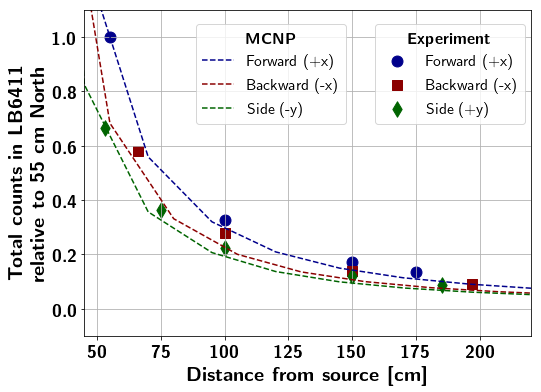

In [20]:
fs = 20
markersize = 120

# plots
normtypes = ['BS_norm_dose']
for normtype in normtypes:
    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(1, 1, 1)
    
    # Plot of the expected MCNP counts
    ax1.plot(df_M_tot['distance'], df_M_tot['North'], '--', label=r"Forward (+x)", color='darkblue')
    ax1.plot(df_M_tot['distance'], df_M_tot['South'], '--', label=r"Backward (-x)", color='darkred')
    ax1.plot(df_M_tot['distance'], df_M_tot['East'], '--', label=r"Side (-y)", color='darkgreen')
    

    
#     _1 = ax1.scatter(df_north['distance'], df_north[normtype], label=r"Forward (+x)",  marker="o", color='darkblue', s=markersize)
    _1 = ax1.scatter(df_north['distance'], df_north[normtype],  marker="o", color='darkblue', s=markersize)
#     _2 = ax1.scatter(df_south['distance'], df_south[normtype], label=r"Backward (-x)",  marker="s", color='darkred', s=markersize)
    _2 = ax1.scatter(df_south['distance'], df_south[normtype],  marker="s", color='darkred', s=markersize)
#     _3 = ax1.scatter(df_east['distance'], df_east[normtype], label=r"Side (+y)",  marker="d", color='darkgreen', s=markersize)
    _3 = ax1.scatter(df_east['distance'], df_east[normtype], marker="d", color='darkgreen', s=markersize)

    my_handles, my_labels = ax1.get_legend_handles_labels()
    leg1 = plt.legend([my_handles[0], my_handles[1], my_handles[2]], [my_labels[0], my_labels[1], my_labels[2]], loc=(0.25, 0.65), markerscale=0, fontsize=fs-4)
    leg1.set_title(r"\textbf{MCNP}", prop = {'size': fs-4})

    leg2 = ax1.legend([_1,_2,_3],[r'Forward (+x)',r'Backward (-x)',r'Side (+y)'], loc=(0.65, 0.65), fontsize=fs-4)
    leg2.set_title(r"\textbf{Experiment}", prop = {'size': fs-4})
    # Manually add the first legend back
    ax1.add_artist(leg1)
#     ax1.errorbar(df_east['distance'], df_east[normtype], xerr=df_east['distance_err'], label=r"East\_exp",  ls='none', marker='s', color='olive', capsize=5)
    plt.xlabel(r"\textbf{Distance from source [cm]}", fontsize=fs)
    plt.ylabel(r"\textbf{Total counts in LB6411}"+ "\n" + r"\textbf{relative to 55 cm North}", fontsize=fs)
#     fig.suptitle(r"\textbf{Total counts expected and measured}")
#     ax1.set_title(r"\textit{Relative to 55 cm North}")
    ax1.grid(b=True, which='major', linestyle='-')
    ax1.grid(b=True, which='minor', linestyle='--')
#     fig.subplots_adjust(bottom=0.5)
#     plt.gcf().autofmt_xdate()
    plt.xlim(45,220)
    plt.ylim(-0.1,1.1)
    # tick font size
    ax1.tick_params('x', colors='black', labelsize=fs-2)	
    ax1.tick_params('y', colors='black', labelsize=fs-2)	
#     plt.legend(loc='best', title=r"\textbf{Legend}")
    # plt.tight_layout()
#     plt.savefig('./2017-10-12_Plots/comparison_relative_w_MCNP_' + normtype + '.png', dpi=600)
    plt.show()
    plt.close()
